In [1]:
import numpy as np
from numpy import ndarray
import copy
from helper_functions import *
%matplotlib inline

**Problem Statement**

The CEO of a restaurant franchise is considering different cities for opening a new outlet. He wants to expand his business to cities that may give his restaurant higher profits. The chain already has restaurants in various cities and you have data for profits and populations from the cities. You also have data on cities that are candidates for a new restaurant. For these cities, you have the city population. The analysis done for identifying which cities may potentially give his business higher profits is as follow:

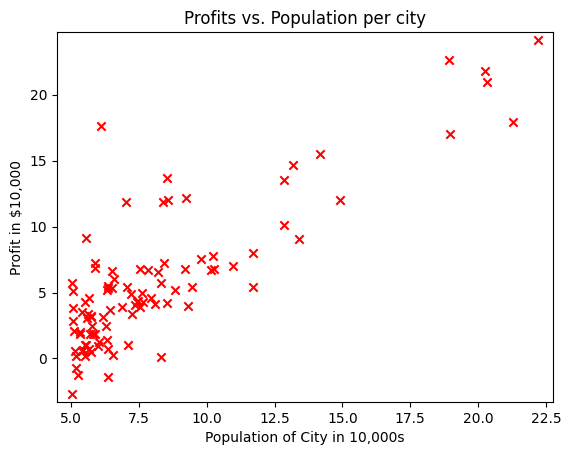

In [2]:
# Load provided data
data = np.loadtxt("data/linear_regression1.txt", delimiter=',')
x_train, y_train = data[:,0], data[:,1]
assert x_train.shape == y_train.shape
plot_data(
    x=x_train, y=y_train, title="Profits vs. Population per city",
    y_title="Profit in $10,000", x_title="Population of City in 10,000s")

Create a cost function implementation using the cost function formula:
$$
J(w, b)=\frac 1 {2m} \sum_{i=0}^{m-1} \big( \hat y^{(i)}-y^{(i)}\big)^2
$$

In [3]:
def cost_function(x: ndarray, y: ndarray, w: float, b: float) -> float:
    """
    Squared error cost function.

    Args:
        x (ndarray): Population of the city.
        y (ndarray): Restaurant profit.
        w (float): Feature parameter.
        b (float): Constant parameter.

    Returns:
        float: Cost value.
    """
    m = x.shape[0]
    cost = ((x * w) + b - y) ** 2
    total_cost = np.sum(cost)
    return total_cost / (2 * m)

assert np.isclose(cost_function(x_train, y_train, 2, 1), 75.203)

Calculate gradient using the following formulas for each step:
$$
w=w - \bigg( \frac{d}{d w}J( w, b)\bigg)
$$
$$
b=b - \bigg( \frac{d}{db}J( w, b)\bigg)
$$
Doing the derivative we arrive at the folowing simplified formulas:
$$
w=w-\frac 1 {m} \sum_{i=0}^{m-1} \big( f_{ w,b}(x^{(i)}) -y^{(i)}\big)x^{(i)}
$$
$$
b=b-\frac 1 {m} \sum_{i=0}^{m-1} \big( f_{ w,b}(x^{(i)}) -y^{(i)}\big)
$$

In [4]:
def calculate_gradient(x: ndarray, y: ndarray,
        w: float, b: float) -> tuple[float, float]: 
    """
    Calculates gradient for w and b parameters.

    Args:
        x (ndarray): Population of the city.
        y (ndarray): Restaurant profit.
        w (float): Feature parameter.
        b (float): Constant parameter.

    Returns:
        tuple[float, float]: Gradient cost of parameters w and b.
    """
    m = x.shape[0]
    predictions_offset = (w * x) + b - y
    w_gradient = (1 / m) * np.sum(predictions_offset * x)
    b_gradient = (1 / m) * np.sum(predictions_offset)
    return w_gradient, b_gradient

Find the optimal parameters using batch gradient descent

In [5]:
def gradient_descent(x: ndarray, y: ndarray, wi: float, bi: float,
    alpha: float, cost_func, gradient_func, iterations: int
) -> tuple[float, float, list[float], list[float], list[float]]:
    """
    Performs batch gradient descent to learn theta.

    Args:
        x (ndarray): Population of the city.
        y (ndarray): Restaurant profit.
        wi (float): Feature parameter (initial value).
        bi (float): Constant parameter (initial value).
        alpha (float): Learning rate.
        cost_func: Cost function.
        gradient_func: Gradient function.
        iterations (int): Number of iterations to perform gradient descent.

    Returns:
        tuple[float, float, list[float], list[float]]:
            - Optimal w parameter.
            - Optimal b parameter.
            - History of cost.
            - History of w parameter.
            - History of b parameter.
    """
    m = len(x)
    J_history = []
    w_history = []
    b_history = []
    w = copy.deepcopy(wi)
    b = copy.deepcopy(bi)

    for i in range(iterations):
        w_gradient, b_gradient = gradient_func(x, y, w, b)
        w = w - w_gradient * alpha
        b = b - b_gradient * alpha
        cost = cost_func(x, y, w, b)
        J_history.append(cost)
        w_history.append(w)
        b_history.append(b)
    return w, b, J_history, w_history, b_history

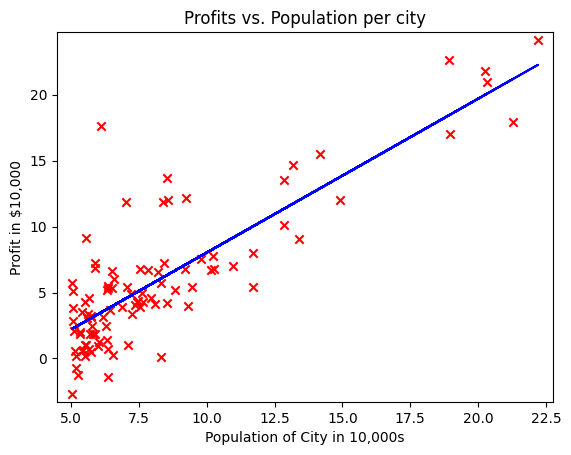

In [6]:
# Run the algorithm
initial_w = 0
initial_b = 0
iterations = 1500
alpha = 0.01

w, b, J_history, w_history, b_history = gradient_descent(
    x_train, y_train, initial_w, initial_b, alpha,
    cost_function, calculate_gradient, iterations)

# Calculate predictions and plot
m = x_train.shape[0]
predicted = (w * x_train) + b
plot_data(
    x=x_train, y=y_train, title="Profits vs. Population per city",
    y_title="Profit in $10,000", x_title="Population of City in 10,000s")
plot_prediction_line(x_train, predicted)